In [1]:
import numpy as np
import pandas as pd

import  matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn

import warnings
warnings.filterwarnings("ignore")

# 1) Data Reading

In [2]:
df = pd.read_csv("C:\\Users\\MD SARMAD\\Desktop\\H2HBABBA1479.csv")

In [3]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200705089,JETR corporation,NaN,2020,1930669762,19-03-2020,20200318,20200319,20200523,USD,RV,1,NaN,5258.71,20200319,NAGD,1.930670e+09,1
1,U001,200775094,SAVE M llc,NaN,2020,1930708822,26-03-2020,20200326,20200326,20200410,USD,RV,1,NaN,76336.64,20200326,NAA8,1.930709e+09,1
2,U001,200020431,DEC in,NaN,2020,1930861359,06-05-2020,20200506,20200506,20200511,USD,RV,1,NaN,12488.63,20200501,NAM2,1.930861e+09,1
3,U001,200707822,PUBLI corporation,02-03-2020 00:00,2020,1930533131,16-02-2020,20200216,20200216,20200302,USD,RV,1,NaN,97916.93,20200216,NAA8,1.930533e+09,0
4,U001,200762301,C&S WH us,13-03-2019 00:00,2019,1928851756,26-02-2019,20190224,20190226,20190313,USD,RV,1,NaN,22492.19,20190226,NAC6,1.928852e+09,0


# 2) Data Preprocessing

In [4]:
df.nunique()

business_code                 6
cust_number                1073
name_customer              4183
clear_date                  398
buisness_year                 2
doc_id                    48855
posting_date                502
document_create_date        508
document_create_date.1      502
due_in_date                 544
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44348
baseline_create_date        504
cust_payment_terms           74
invoice_id                48849
isOpen                        2
dtype: int64

#Removing Unique Value

In [5]:
#dropping posting_id and area_business due to only value and no value throughout
df.drop(['posting_id','area_business'],axis = 1,inplace = True)

In [6]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

#Null Imputation

In [7]:
#fill null value of invoice_id using interpolation

df.invoice_id.interpolate(inplace=True)

In [8]:
#Copying the rows where clear_date in null

df1 = df[df.clear_date.isnull()]
train = df[df.clear_date.isnull() == False]

In [9]:
train.nunique()

business_code                 6
cust_number                1032
name_customer              3874
clear_date                  398
buisness_year                 2
doc_id                    39164
posting_date                421
document_create_date        427
document_create_date.1      421
due_in_date                 491
invoice_currency              2
document type                 2
total_open_amount         35702
baseline_create_date        426
cust_payment_terms           72
invoice_id                39164
isOpen                        1
dtype: int64

In [10]:
#dropping document type and isOpen from train data due to only value throughout

train.drop(['isOpen'],axis=1,inplace = True)

#Currency flatness

In [11]:
train.invoice_currency.value_counts()

USD    36893
CAD     3107
Name: invoice_currency, dtype: int64

In [12]:
#making amount in single currency value

train['actual_open_amount'] = train['total_open_amount'].where(train['invoice_currency']=='USD', df['total_open_amount'] * 0.8)

In [13]:
#dropping invoice_currency and total_open_amount due to no further use

train.drop(['invoice_currency','total_open_amount'],axis =1,inplace = True)

#DATE Formatting

In [14]:
train['clear_date']=pd.to_datetime(train['clear_date']).dt.normalize()
train['posting_date']=pd.to_datetime(train['posting_date']).dt.normalize()
train['due_in_date']=pd.to_datetime(train['due_in_date'],format='%Y%m%d')

In [15]:
#Creating new column for delay_days

train['delay_days'] = pd.to_numeric((train['clear_date']-train['due_in_date']).dt.days, downcast='integer')

In [16]:
#dropping clear_date and due_in_date due to no further use

train.drop(['clear_date','due_in_date'],axis =1,inplace = True)

In [17]:
train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,document type,baseline_create_date,cust_payment_terms,invoice_id,actual_open_amount,delay_days
3,U001,200707822,PUBLI corporation,2020,1930533131,2020-02-16,20200216,20200216,RV,20200216,NAA8,1.930533e+09,97916.93,-28
4,U001,200762301,C&S WH us,2019,1928851756,2019-02-26,20190224,20190226,RV,20190226,NAC6,1.928852e+09,22492.19,0
5,U001,200705742,DOT in,2019,1930165046,2019-11-18,20191118,20191118,RV,20191118,NAA8,1.930165e+09,61968.61,-266
6,U001,200803720,DEC corporation,2019,1929842496,2019-07-09,20190907,20190907,RV,20190901,NAM4,1.929842e+09,1305.26,-8
7,U001,200705089,JETR llc,2019,1929562148,2019-02-07,20190701,20190702,RV,20190702,NAA8,1.929562e+09,34954.86,0


# 3) Splitting

In [18]:
#sorting the data before splitting

train.sort_values(by=['posting_date'],inplace = True)
train.reset_index(drop=True, inplace=True)

In [19]:
X = train.drop('delay_days',axis=1)
y = train['delay_days']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)
X_validation,X_test,y_validation,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=0 , shuffle = False)
X_train.shape , X_validation.shape , X_test.shape

((28000, 13), (6000, 13), (6000, 13))

In [21]:
X_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,document type,baseline_create_date,cust_payment_terms,invoice_id,actual_open_amount
0,U001,200793568,SUPE corporation,2019,1928537936,2018-12-30,20181229,20181230,RV,20181230,NAA8,1.928538e+09,2076.03
1,U001,200704858,WAKE co,2019,1928534357,2018-12-30,20181229,20181230,RV,20181230,NAA8,1.928534e+09,114737.60
2,U001,200726979,BJ'S foundation,2019,1928537244,2018-12-30,20181229,20181230,RV,20181230,NAA8,1.928537e+09,116.38
3,U001,200769623,WAL-MAR corp,2019,1928542942,2018-12-30,20181230,20181230,RV,20181230,NAH4,1.928543e+09,13524.17
4,U001,200769623,WAL-MAR systems,2019,1928535906,2018-12-30,20181229,20181230,RV,20181230,NAH4,1.928536e+09,16224.21


# 4) EDA

<AxesSubplot:xlabel='delay_days', ylabel='Density'>

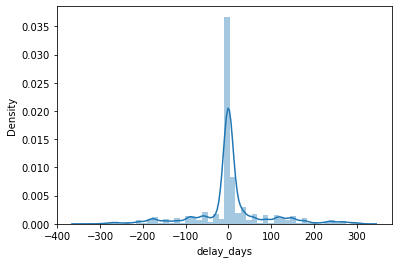

In [22]:
sns.distplot(y_train)

<AxesSubplot:ylabel='Frequency'>

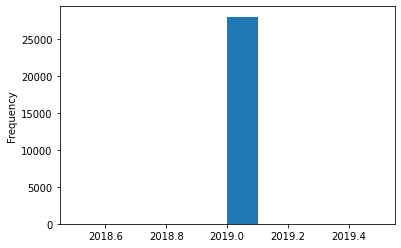

In [23]:
X_train.buisness_year.plot.hist(rot = 0,width = 0.1)

In [24]:
#dropping buisness_year due to only value
X_train.drop(['buisness_year'],axis = 1,inplace = True)
X_validation.drop(['buisness_year'],axis = 1,inplace = True)
X_test.drop(['buisness_year'],axis = 1,inplace = True)

<AxesSubplot:xlabel='delay_days', ylabel='posting_date'>

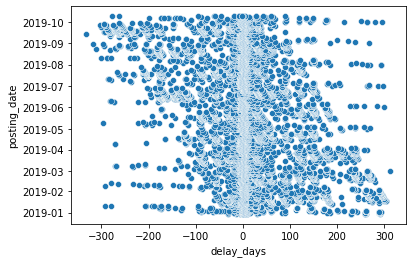

In [25]:
#No major outliers
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay_days", y="posting_date")

# 5) Feature Engineering

In [26]:
def unique():
    print("..........TRAIN..........")
    print(X_train.nunique())
    print("\n..........VALIDATION..........")
    print(X_validation.nunique())
    print("..........TEST...........")
    print(X_test.nunique())
unique()

..........TRAIN..........
business_code                 6
cust_number                 933
name_customer              3321
doc_id                    27409
posting_date                284
document_create_date        321
document_create_date.1      285
document type                 2
baseline_create_date        321
cust_payment_terms           64
invoice_id                27409
actual_open_amount        25223
dtype: int64

..........VALIDATION..........
business_code                4
cust_number                508
name_customer             1503
doc_id                    5876
posting_date                62
document_create_date       160
document_create_date.1      62
document type                1
baseline_create_date       131
cust_payment_terms          47
invoice_id                5876
actual_open_amount        5638
dtype: int64
..........TEST...........
business_code                5
cust_number                501
name_customer             1478
doc_id                    5880
posting_da

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           28000 non-null  object        
 1   cust_number             28000 non-null  object        
 2   name_customer           28000 non-null  object        
 3   doc_id                  28000 non-null  int64         
 4   posting_date            28000 non-null  datetime64[ns]
 5   document_create_date    28000 non-null  int64         
 6   document_create_date.1  28000 non-null  int64         
 7   document type           28000 non-null  object        
 8   baseline_create_date    28000 non-null  int64         
 9   cust_payment_terms      28000 non-null  object        
 10  invoice_id              28000 non-null  float64       
 11  actual_open_amount      28000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), ob

#Label Encoding

In [28]:
# 1) labelEcncoding business_code

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X_train['business_code'])
X_train['business_code_en'] = le.transform(X_train['business_code'])

In [29]:
#transforming same as X_train in X_validation and X_test

X_validation['business_code_en'] = le.transform(X_validation['business_code'])
X_test['business_code_en'] = le.transform(X_test['business_code'])

In [30]:
#dropping business_code

X_train.drop(['business_code'],axis =1,inplace = True)
X_validation.drop(['business_code'],axis =1,inplace = True)
X_test.drop(['business_code'],axis =1,inplace = True)

In [31]:
# 2) labelEncoding document type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X_train['document type'])
X_train['document_type_en'] = le.transform(X_train['document type'])

In [32]:
#transforming same as X_train in X_validation and X_test

X_validation['document_type_en'] = le.transform(X_validation['document type'])
X_test['document_type_en'] = le.transform(X_test['document type'])

In [33]:
#dropping document type

X_train.drop(['document type'],axis =1,inplace = True)
X_validation.drop(['document type'],axis =1,inplace = True)
X_test.drop(['document type'],axis =1,inplace = True)

In [34]:
'''dropping cust_number,name_customer,cust_payment_terms
due to lot of values in a column and different for
all X_train,X_validation,X_test
'''
X_train.drop(['cust_number','name_customer','cust_payment_terms'],axis =1,inplace = True)
X_validation.drop(['cust_number','name_customer','cust_payment_terms'],axis =1,inplace = True)
X_test.drop(['cust_number','name_customer','cust_payment_terms'],axis =1,inplace = True)


In [35]:
#extracting month,day and week_day from posting_date

X_train['month'] = pd.to_datetime(X_train['posting_date']).dt.month
X_train['day'] = pd.to_datetime(X_train['posting_date']).dt.day
X_train['week_day'] = pd.to_datetime(X_train['posting_date']).dt.weekday

In [36]:
X_validation['month'] = pd.to_datetime(X_validation['posting_date']).dt.month
X_validation['day'] = pd.to_datetime(X_validation['posting_date']).dt.day
X_validation['week_day'] = pd.to_datetime(X_validation['posting_date']).dt.weekday

In [37]:
X_test['month'] = pd.to_datetime(X_test['posting_date']).dt.month
X_test['day'] = pd.to_datetime(X_test['posting_date']).dt.day
X_test['week_day'] = pd.to_datetime(X_test['posting_date']).dt.weekday

In [38]:
#dropping posting_date due to no further usage.

X_train.drop(['posting_date'],axis =1,inplace = True)
X_validation.drop(['posting_date'],axis =1,inplace = True)
X_test.drop(['posting_date'],axis =1,inplace = True)

# 6) Feature Selection

<AxesSubplot:>

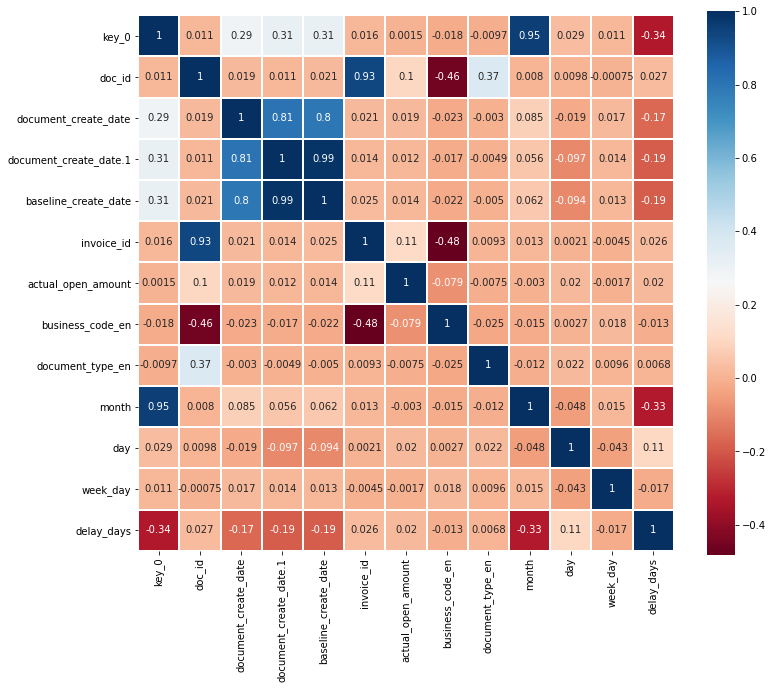

In [39]:
plt.figure(figsize=(12,10))
cor = X_train.merge(y_train,on = X_train.index).corr()
sns.heatmap(cor,linewidths=0.1,vmax=1.0,square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

In [40]:
#dropping doc_id since invoice_id is almost similar to it

X_train.drop(['doc_id'],axis =1,inplace = True)
X_validation.drop(['doc_id'],axis =1,inplace = True)
X_test.drop(['doc_id'],axis =1,inplace = True)

In [41]:
#dropping document_type_en due to very low correlation

X_train.drop(['document_type_en'],axis =1,inplace = True)
X_validation.drop(['document_type_en'],axis =1,inplace = True)
X_test.drop(['document_type_en'],axis =1,inplace = True)

In [42]:
#dropping document_create_date and document_create_date.1 due to very low correlation with target data

X_train.drop(['document_create_date.1'],axis = 1,inplace = True)
X_validation.drop(['document_create_date.1'],axis = 1,inplace = True)
X_test.drop(['document_create_date.1'],axis = 1,inplace = True)

In [43]:
#Covariance

X_train.merge(y_train,on = X_train.index).cov()

,key_0,document_create_date,baseline_create_date,invoice_id,actual_open_amount,business_code_en,month,day,week_day,delay_days
key_0,6.533567e+07,2.011120e+06,1.714825e+06,3.602235e+10,4.773181e+05,-8.026760e+01,2.049337e+04,2.095643e+03,1.652029e+02,-2.279355e+05
document_create_date,2.011120e+06,7.270966e+05,4.574459e+05,5.006900e+09,6.171904e+05,-1.134590e+01,1.922686e+02,-1.410503e+02,2.692122e+01,-1.207615e+04
baseline_create_date,1.714825e+06,4.574459e+05,4.541017e+05,4.583495e+09,3.544824e+05,-8.563338e+00,1.104728e+02,-5.621203e+02,1.698567e+01,-1.072516e+04
invoice_id,3.602235e+10,5.006900e+09,4.583495e+09,7.651045e+16,1.208895e+12,-7.554879e+07,9.771473e+06,5.082304e+06,-2.349721e+06,6.111988e+08
actual_open_amount,4.773181e+05,6.171904e+05,3.544824e+05,1.208895e+12,1.501541e+09,-1.744635e+03,-3.086562e+02,6.874961e+03,-1.213898e+02,6.366682e+04
business_code_en,-8.026760e+01,-1.134590e+01,-8.563338e+00,-7.554879e+07,-1.744635e+03,3.218338e-01,-2.301105e-02,1.365452e-02,1.877762e-02,-5.986048e-01
month,2.049337e+04,1.922686e+02,1.104728e+02,9.771473e+06,-3.086562e+02,-2.301105e-02,7.066180e+00,-1.121295e+00,7.423787e-02,-7.354209e+01
day,2.095643e+03,-1.410503e+02,-5.621203e+02,5.082304e+06,6.874961e+03,1.365452e-02,-1.121295e+00,7.836673e+01,-7.173236e-01,7.843371e+01
week_day,1.652029e+02,2.692122e+01,1.698567e+01,-2.349721e+06,-1.213898e+02,1.877762e-02,7.423787e-02,-7.173236e-01,3.557673e+00,-2.718228e+00
delay_days,-2.279355e+05,-1.207615e+04,-1.072516e+04,6.111988e+08,6.366682e+04,-5.986048e-01,-7.354209e+01,7.843371e+01,-2.718228e+00,7.064664e+03


In [44]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.01)
vt.fit(X_train)
vt.variances_

array([7.27070647e+05, 4.54085492e+05, 7.65077222e+16, 1.50148732e+09,
       3.21822346e-01, 7.06592811e+00, 7.83639318e+01, 3.55754553e+00])

## 7) Modelling

#1 Linear Regression

In [45]:
#importing model and fitting

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
#prediction of X_validation data

lr_predict1 = lr_model.predict(X_validation)
lr_predict1

array([-57.03744424, -57.09572776, -47.0172466 , ..., -76.68016483,
       -76.48714522, -76.19064259])

In [47]:
#mean square error

from sklearn.metrics import mean_squared_error as mse
mse(y_validation, lr_predict1, squared=False)

99.96701985628519

In [48]:
#prediction on X_test data

lr_predict2 = lr_model.predict(X_test)
mse(y_test,lr_predict2,squared = False)

223.70840096419283

In [49]:
met = pd.DataFrame(zip(lr_predict2, y_test),columns=['Predicted','Actuals'])
met

,Predicted,Actuals
0,-76.586478,2
1,-75.029381,-1
2,-76.405221,1
3,-76.703441,0
4,-75.228860,0
...,...,...
5995,-270.301416,3
5996,-271.404240,12
5997,-272.086959,0
5998,-269.917139,1


In [50]:
#r2 score

from sklearn.metrics import r2_score
lr_r2 = r2_score(y_test,lr_predict2)
lr_r2

-5.899196856585639

#2 Support Vector Regression

In [51]:
#importing model and fitting

from sklearn.svm import SVR
svr_model = SVR(kernel = 'rbf')
svr_model.fit(X_train,y_train)

SVR()

In [52]:
#prediction of X_validation data

svr_predict1 = svr_model.predict(X_validation)
svr_predict1

array([0.10107261, 0.10106002, 4.90000696, ..., 0.10113112, 0.10108214,
       0.10107721])

In [53]:
#mean square error

from sklearn.metrics import mean_squared_error as mse
mse(y_validation, svr_predict1, squared=False)

112.57306005266673

In [54]:
#prediction on X_test data

svr_predict2 = svr_model.predict(X_test)

In [55]:
#mean square error

mse(y_test, svr_predict2, squared=False)

94.24940154212206

In [56]:
#r2_score

from sklearn.metrics import r2_score
svr_r2 = r2_score(y_test,svr_predict2)
svr_r2

-0.22459125103770128

#3 Decision Tree Regressor

In [57]:
#importing model and fitting

from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state=0 , max_depth=7)
dtr_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=0)

In [58]:
#prediction of X_validation data

dtr_predict1 = dtr_model.predict(X_validation)
dtr_predict1

array([  8.13333333,  -3.71741362, -45.29761905, ...,  -3.71741362,
        -3.71741362,  -3.71741362])

In [59]:
#mean square error

from sklearn.metrics import mean_squared_error as mse
mse(y_validation, svr_predict1, squared=False)

112.57306005266673

In [60]:
#mean square error
#prediction on X_test data

dtr_predict2 = dtr_model.predict(X_test)
mse(y_test, dtr_predict2, squared=False)

110.68715742749553

In [61]:
#r2_score

from sklearn.metrics import r2_score
dtr_r2 = r2_score(y_test,dtr_predict2)
dtr_r2

-0.6889952130355121

#4 Random Forest Regressor

In [62]:
#importing model and fitting

from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr_model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [63]:
#prediction of X_validation data

rfr_predict1 = rfr_model.predict(X_validation)
rfr_predict1

array([  14.63, -145.11,   -9.14, ...,  -31.95,  -90.84,   -1.8 ])

In [64]:
#mean square error
#prediction on X_test data

from sklearn.metrics import mean_squared_error as mse
mse(y_validation, rfr_predict1, squared=False)

95.74781845164932

In [65]:
#mean square error

rfr_predict2 = rfr_model.predict(X_test)
mse(y_test, rfr_predict2, squared=False)

113.86811062204086

In [66]:
#r2_score

from sklearn.metrics import r2_score
rfr_r2 = r2_score(y_test,rfr_predict2)
rfr_r2

-0.7874676025861305

#5 XGB Regressor

In [67]:
#importing model and fitting

from xgboost import XGBRegressor
xgb_model = XGBRegressor(max_depth = 7)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
#prediction of X_validation data

xgb_predict1 = xgb_model.predict(X_validation)
xgb_predict1

array([ 12.8411045, -87.62819  ,   2.6491716, ..., -34.40841  ,
       -63.065746 , -28.194288 ], dtype=float32)

In [69]:
#mean square error
#prediction on X_test data

from sklearn.metrics import mean_squared_error as mse
mse(y_validation, xgb_predict1, squared=False)

105.06778

In [70]:
#mean square error

xgb_predict2 = xgb_model.predict(X_test)
mse(y_test, xgb_predict2, squared=False)

99.35168

In [71]:
#r2_score

from sklearn.metrics import r2_score
xgb_r2 = r2_score(y_test,xgb_predict2)
xgb_r2

-0.3607688304388772

#Model comparision

In [72]:
ALGO = ['Linear Regression','SVR','Decision Tree Regression','Random Forest Regressor','XGB Regresson']
mse = [mse(y_test,lr_predict2,squared = False),mse(y_test, svr_predict2, squared=False),mse(y_test, dtr_predict2, squared=False),mse(y_test, rfr_predict2, squared=False),mse(y_test, xgb_predict2, squared=False)]
r2_score = [lr_r2,svr_r2,dtr_r2,rfr_r2,xgb_r2]

In [73]:
model = pd.DataFrame(list(zip(ALGO,mse,r2_score)))
Frame=pd.DataFrame(model.values, columns = ["ALGORITHM", "mse", "r2_score"])
Frame

,ALGORITHM,mse,r2_score
0,Linear Regression,223.708401,-5.899197
1,SVR,94.249402,-0.224591
2,Decision Tree Regression,110.687157,-0.688995
3,Random Forest Regressor,113.868111,-0.787468
4,XGB Regresson,99.351677,-0.360769


# 8) Processing Before Prediction

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 27999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   document_create_date  28000 non-null  int64  
 1   baseline_create_date  28000 non-null  int64  
 2   invoice_id            28000 non-null  float64
 3   actual_open_amount    28000 non-null  float64
 4   business_code_en      28000 non-null  int32  
 5   month                 28000 non-null  int64  
 6   day                   28000 non-null  int64  
 7   week_day              28000 non-null  int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 1.8 MB


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49997
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  object 
 1   cust_number             10000 non-null  object 
 2   name_customer           10000 non-null  object 
 3   clear_date              0 non-null      object 
 4   buisness_year           10000 non-null  int64  
 5   doc_id                  10000 non-null  int64  
 6   posting_date            10000 non-null  object 
 7   document_create_date    10000 non-null  int64  
 8   document_create_date.1  10000 non-null  int64  
 9   due_in_date             10000 non-null  int64  
 10  invoice_currency        10000 non-null  object 
 11  document type           10000 non-null  object 
 12  total_open_amount       10000 non-null  float64
 13  baseline_create_date    10000 non-null  int64  
 14  cust_payment_terms      10000 non-null

In [76]:
#dropping clear_date since it is to be predicted

df1.drop(['clear_date'],axis=1,inplace = True)

In [77]:
#dropping unnecessary columns which are not in X_train

df1.drop(['name_customer','cust_number','buisness_year','doc_id','document_create_date.1','document type',
         'cust_payment_terms','isOpen'],axis=1,inplace=True)

In [78]:
#Changing currency and amount as on X_train

df1['actual_open_amount'] = df1['total_open_amount'].where(df1['invoice_currency']=='USD', df1['total_open_amount'] * 0.8)

In [79]:
#dropping invoice_currency and total_open_amount since it has no further usage

df1.drop(['invoice_currency','total_open_amount'],axis =1,inplace = True)

In [80]:
#making month,day and week_day column as on X_train

df1['month'] = pd.to_datetime(df1['posting_date']).dt.month
df1['day'] = pd.to_datetime(df1['posting_date']).dt.day
df1['week_day'] = pd.to_datetime(df1['posting_date']).dt.weekday

In [81]:
#dropping posting_date since it has no further usage

df1.drop(['posting_date'],axis=1,inplace=True)

In [82]:
#keeping due_in_date in new dataframe df_temp for calculating prediction date later

df1['due_in_date']=pd.to_datetime(df1['due_in_date'],format='%Y%m%d')
df_temp = pd.DataFrame(df1['due_in_date'])

In [83]:
#dropping due_in_date since it has no further usage

df1.drop(['due_in_date'],axis=1,inplace=True)

In [84]:
#labelEcncoding business_code

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1['business_code'])
df1['business_code_en'] = le.transform(df1['business_code'])

In [85]:
#dropping business_code since it has no further usage

df1.drop(['business_code'],axis=1,inplace=True)

In [86]:
df1

,document_create_date,baseline_create_date,invoice_id,actual_open_amount,month,day,week_day,business_code_en
0,20200318,20200319,1.930670e+09,5258.71,3,19,3,1
1,20200326,20200326,1.930709e+09,76336.64,3,26,3,1
2,20200506,20200501,1.930861e+09,12488.63,6,5,4,1
11,20200312,20200313,1.930642e+09,6272.49,3,13,4,1
22,20200305,20200305,1.930606e+09,120013.93,5,3,6,1
...,...,...,...,...,...,...,...,...
49985,20200414,20200413,1.930783e+09,30073.00,4,13,0,1
49987,20200404,20200405,1.930747e+09,79.84,5,4,0,1
49990,20200403,20200402,1.930739e+09,22930.40,2,4,1,1
49992,20200407,20200408,1.930758e+09,13873.46,8,4,1,1


# 10) Prediction

In [87]:
#predicting model on XGB

prediction_result = xgb_model.predict(df1)

In [88]:
prediction_result = pd.Series(prediction_result,name='delay_days')

In [89]:
#merging prediction result on final test data(df1)

df1 = df1.merge(prediction_result, on=df1.index)

In [90]:
df1

,key_0,document_create_date,baseline_create_date,invoice_id,actual_open_amount,month,day,week_day,business_code_en,delay_days
0,0,20200318,20200319,1.930670e+09,5258.71,3,19,3,1,-32.163250
1,1,20200326,20200326,1.930709e+09,76336.64,3,26,3,1,11.861892
2,2,20200506,20200501,1.930861e+09,12488.63,6,5,4,1,-59.330139
3,11,20200312,20200313,1.930642e+09,6272.49,3,13,4,1,-27.888649
4,22,20200305,20200305,1.930606e+09,120013.93,5,3,6,1,11.236579
...,...,...,...,...,...,...,...,...,...,...
9995,49985,20200414,20200413,1.930783e+09,30073.00,4,13,0,1,12.283953
9996,49987,20200404,20200405,1.930747e+09,79.84,5,4,0,1,-29.738729
9997,49990,20200403,20200402,1.930739e+09,22930.40,2,4,1,1,-16.681688
9998,49992,20200407,20200408,1.930758e+09,13873.46,8,4,1,1,-21.695953


In [91]:
#Concatinating final test data(df1) and due date (due_in_date) for

result = pd.concat([df1,df_temp],axis=1,join = 'inner')

In [92]:
result.head()

,key_0,document_create_date,baseline_create_date,invoice_id,actual_open_amount,month,day,week_day,business_code_en,delay_days,due_in_date
0,0,20200318,20200319,1.930670e+09,5258.71,3,19,3,1,-32.163250,2020-05-23
1,1,20200326,20200326,1.930709e+09,76336.64,3,26,3,1,11.861892,2020-04-10
2,2,20200506,20200501,1.930861e+09,12488.63,6,5,4,1,-59.330139,2020-05-11
11,55,20200422,20200422,1.930814e+09,39355.64,4,22,2,1,15.186136,2020-05-17
22,89,20200315,20200315,1.930654e+09,129113.69,3,15,6,1,36.811802,2020-03-20


In [93]:
#payment_date = due_in_date + delay_days

result['payment_date'] = pd.to_datetime(result.due_in_date) + pd.to_timedelta(pd.np.ceil(result.delay_days), unit="D")
result.head()

,key_0,document_create_date,baseline_create_date,invoice_id,actual_open_amount,month,day,week_day,business_code_en,delay_days,due_in_date,payment_date
0,0,20200318,20200319,1.930670e+09,5258.71,3,19,3,1,-32.163250,2020-05-23,2020-04-21
1,1,20200326,20200326,1.930709e+09,76336.64,3,26,3,1,11.861892,2020-04-10,2020-04-22
2,2,20200506,20200501,1.930861e+09,12488.63,6,5,4,1,-59.330139,2020-05-11,2020-03-13
11,55,20200422,20200422,1.930814e+09,39355.64,4,22,2,1,15.186136,2020-05-17,2020-06-02
22,89,20200315,20200315,1.930654e+09,129113.69,3,15,6,1,36.811802,2020-03-20,2020-04-26


In [94]:
#Aging bucket for payment status

result['aging_bucket'] =""
result.loc[result['delay_days'].apply(int) > 60, 'aging_bucket'] = '>60'
result.loc[(result['delay_days'].apply(int) >= 46) & (result['delay_days'].apply(int) <= 60),'aging_bucket'] = '46-60'
result.loc[(result['delay_days'].apply(int) >= 31) & (result['delay_days'].apply(int) <= 45),'aging_bucket'] = '31-45'
result.loc[(result['delay_days'].apply(int) >= 16) & (result['delay_days'].apply(int) <= 30),'aging_bucket'] = '16-30'
result.loc[(result['delay_days'].apply(int) >= 1 ) & (result['delay_days'].apply(int) <= 15),'aging_bucket'] = '1-15'
result.loc[result['delay_days'].apply(int) <= 0, 'aging_bucket'] = 'Paid'

In [95]:
result

,key_0,document_create_date,baseline_create_date,invoice_id,actual_open_amount,month,day,week_day,business_code_en,delay_days,due_in_date,payment_date,aging_bucket
0,0,20200318,20200319,1.930670e+09,5258.71,3,19,3,1,-32.163250,2020-05-23,2020-04-21,Paid
1,1,20200326,20200326,1.930709e+09,76336.64,3,26,3,1,11.861892,2020-04-10,2020-04-22,1-15
2,2,20200506,20200501,1.930861e+09,12488.63,6,5,4,1,-59.330139,2020-05-11,2020-03-13,Paid
11,55,20200422,20200422,1.930814e+09,39355.64,4,22,2,1,15.186136,2020-05-17,2020-06-02,1-15
22,89,20200315,20200315,1.930654e+09,129113.69,3,15,6,1,36.811802,2020-03-20,2020-04-26,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,49907,20200414,20200416,1.930784e+09,14132.59,4,16,3,1,-67.637329,2020-04-01,2020-01-25,Paid
9987,49922,20200415,20200416,1.930788e+09,2404.74,4,16,3,1,-36.528942,2020-05-05,2020-03-30,Paid
9992,49940,20200327,20200328,1.930709e+09,50531.61,3,28,5,1,14.845479,2020-05-15,2020-05-30,1-15
9993,49954,20200328,20200329,1.930711e+09,45908.14,3,29,6,1,14.739482,2020-04-07,2020-04-22,1-15


In [96]:
#Final Result

main_result = pd.DataFrame(zip(result.invoice_id, result.due_in_date, result.actual_open_amount, result.payment_date,result.aging_bucket),columns = ['Invoice ID','Due Date','Actual Open Amount($)','Payment Date','Aging Bucket(days)'])
main_result.head()

,Invoice ID,Due Date,Actual Open Amount($),Payment Date,Aging Bucket(days)
0,1.930670e+09,2020-05-23,5258.71,2020-04-21,Paid
1,1.930709e+09,2020-04-10,76336.64,2020-04-22,1-15
2,1.930861e+09,2020-05-11,12488.63,2020-03-13,Paid
3,1.930814e+09,2020-05-17,39355.64,2020-06-02,1-15
4,1.930654e+09,2020-03-20,129113.69,2020-04-26,31-45
